# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [137]:
print('Beginning Data Retrieval\n-----------------------------')
n=0
s=1
data_dict={}
base_url='https://api.openweathermap.org/data/2.5/weather?'
for i in cities:
    try:
        city_name=i
        
        #get weather data for city
        url=base_url+f'q={city_name}&units=imperial&appid={weather_api_key}'
        data_json=requests.get(url).json()
        
        #focus on certain features
        lon=float((data_json['coord']['lon']))
        lat=float((data_json['coord']['lat']))
        temperature=float(data_json['main']['temp_max'])
        humidity=float(data_json['main']['humidity'])
        cloudiness=float(data_json['clouds']['all'])
        wind_speed=float(data_json['wind']['speed'])
        country=data_json['sys']['country']
        date=float(data_json['dt'])
        data_dict.update({city_name:[lat,lon,temperature,humidity,cloudiness,wind_speed,country,date]})
        
        #assign every 50 records to one set
        n+=1
        if n>50:
            n=1
            s+=1
            print(f'Processing Record {n} of Set {s} | {i}')
        else:
            print(f'Processing Record {n} of Set {s} | {i}')
    except:
        print(f'City not found. Skipping...')
        pass


print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kisangani
Processing Record 2 of Set 1 | bonavista
Processing Record 3 of Set 1 | taoudenni
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | aleksandrov gay
City not found. Skipping...
Processing Record 8 of Set 1 | virginia beach
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | balsas
Processing Record 11 of Set 1 | jalu
Processing Record 12 of Set 1 | povenets
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | pacific grove
Processing Record 16 of Set 1 | fare
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | lata
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | portland
Processing Record 21 of Set 1 | novopokrovka
Processing Record 22 of S

Processing Record 38 of Set 4 | hasaki
City not found. Skipping...
Processing Record 39 of Set 4 | okmulgee
Processing Record 40 of Set 4 | collie
Processing Record 41 of Set 4 | kruisfontein
Processing Record 42 of Set 4 | luanda
Processing Record 43 of Set 4 | cozumel
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | jucas
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | walvis bay
Processing Record 48 of Set 4 | hambantota
Processing Record 49 of Set 4 | cockburn town
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | gat
Processing Record 2 of Set 5 | dunedin
Processing Record 3 of Set 5 | mango
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | los llanos de aridane
Processing Record 6 of Set 5 | houston
Processing Record 7 of Set 5 | henties bay
Processing Record 8 of Set 5 | rocha
Processing Record 9 of Set 5 | paamiut
Processing Record 10 of Set 5 | atuona
Processing Record 11 of Set 5 | bod

Processing Record 29 of Set 8 | zhangjiakou
Processing Record 30 of Set 8 | odweyne
Processing Record 31 of Set 8 | alakurtti
Processing Record 32 of Set 8 | iquitos
Processing Record 33 of Set 8 | booue
Processing Record 34 of Set 8 | knysna
City not found. Skipping...
Processing Record 35 of Set 8 | port moresby
City not found. Skipping...
City not found. Skipping...
Processing Record 36 of Set 8 | morgantown
Processing Record 37 of Set 8 | emba
Processing Record 38 of Set 8 | port augusta
Processing Record 39 of Set 8 | paita
City not found. Skipping...
Processing Record 40 of Set 8 | geraldton
Processing Record 41 of Set 8 | burla
Processing Record 42 of Set 8 | inirida
Processing Record 43 of Set 8 | rockland
City not found. Skipping...
Processing Record 44 of Set 8 | tambau
Processing Record 45 of Set 8 | cairns
Processing Record 46 of Set 8 | phan thiet
Processing Record 47 of Set 8 | vermilion
Processing Record 48 of Set 8 | shimoda
Processing Record 49 of Set 8 | vuktyl
City n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [187]:
df=pd.DataFrame(data_dict).T
df.reset_index(inplace=True)
df.columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']

In [188]:
#export into a csv
df.to_csv("weather_data.csv")

In [189]:
df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [190]:
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kisangani,0.52,25.2,71.1,91,99,0.98,CD,1.59537e+09
1,bonavista,48.65,-53.11,64.44,76,68,8.25,CA,1.59537e+09
2,taoudenni,22.68,-3.98,102.11,11,0,14.03,ML,1.59537e+09
3,bethel,41.37,-73.41,84.2,48,1,5.82,US,1.59537e+09
4,punta arenas,-53.15,-70.92,23,92,9,2.24,CL,1.59537e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [191]:
df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].astype(float).describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,21.050360,18.088669,68.870917,71.938849,48.845324,7.560683,1.595375e+09
std,33.108961,89.739929,13.726242,19.400098,37.865973,5.135773,8.686193e+01
min,-54.800000,-175.200000,23.000000,3.000000,0.000000,0.220000,1.595374e+09
25%,-5.147500,-59.807500,57.990000,63.000000,6.000000,3.590000,1.595375e+09
50%,26.220000,22.185000,71.600000,76.000000,46.500000,5.990000,1.595375e+09
75%,47.655000,96.220000,79.657500,86.000000,89.250000,10.290000,1.595375e+09
max,78.220000,179.320000,107.600000,100.000000,100.000000,29.970000,1.595375e+09


In [192]:
#  Get the indices of cities that have humidity over 100%.
df.index[df['Humidity']>100]

Int64Index([], dtype='int64')

In [193]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [194]:
data=df[['Lat','Max Temp']]
data.head()

,Lat,Max Temp
0,0.52,71.1
1,48.65,64.44
2,22.68,102.11
3,41.37,84.2
4,-53.15,23


Text(0, 0.5, 'Max Temperature (F)')

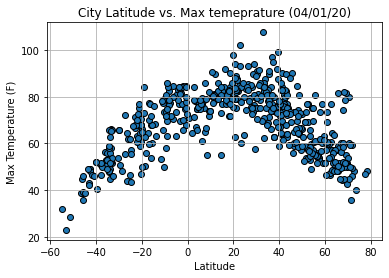

In [208]:
#plot graphic
plt.scatter(data['Lat'],data['Max Temp'],edgecolors='black')
plt.grid()
plt.title('City Latitude vs. Max temeprature (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')


## Latitude vs. Humidity Plot

In [210]:
data=df[['Lat','Humidity']]
data.head()

,Lat,Humidity
0,0.52,91
1,48.65,76
2,22.68,11
3,41.37,48
4,-53.15,92


Text(0.5, 0, 'Latitude')

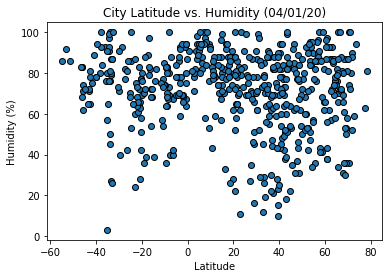

In [212]:
plt.scatter(data['Lat'],data['Humidity'],edgecolors='black')
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

## Latitude vs. Cloudiness Plot

In [213]:
data=df[['Lat','Cloudiness']]
data.head()

,Lat,Cloudiness
0,0.52,99
1,48.65,68
2,22.68,0
3,41.37,1
4,-53.15,9


Text(0.5, 0, 'Latitude')

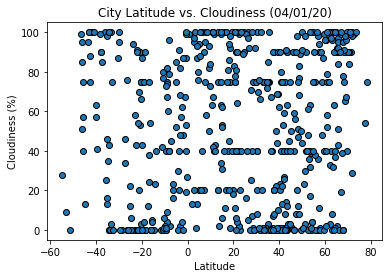

In [215]:
plt.scatter(data['Lat'],data['Cloudiness'],edgecolors='black')
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

## Latitude vs. Wind Speed Plot

In [216]:
data=df[['Lat','Wind Speed']]
data.head()

,Lat,Wind Speed
0,0.52,0.98
1,48.65,8.25
2,22.68,14.03
3,41.37,5.82
4,-53.15,2.24


Text(0.5, 0, 'Latitude')

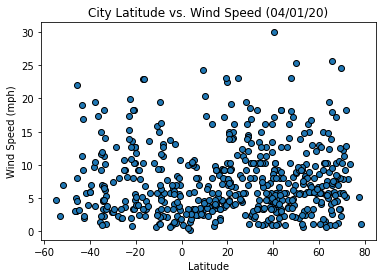

In [218]:
plt.scatter(data['Lat'],data['Wind Speed'],edgecolors='black')
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [255]:
def liner_reg_func(x,y):
    
    global x_value #for reg_annot usage
    global y_value #for reg_annot usage
    
    x_value=x
    y_value=y
    
    plt.scatter(x=x_value,y=y_value)
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    

def reg_annot(loc):
    
    slope, intercept, r_value, p_value, std_err = linregress(x_value,y_value)
    regress_values=x_value*slope+intercept
    
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}',xy=loc,fontsize=15,color='r')
    print(f'The r-squared is: {r_value**2}')

In [15]:
# Create Northern and Southern Hemisphere DataFrames

In [178]:
df_ns=df.copy()
df_ns['NS']=['N' if i>0 else 'S' for i in df_ns['Lat']]
df_ns.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,NS
0,kisangani,0.52,25.20,71.10,91.0,99.0,0.98,CD,1.595375e+09,N
1,bonavista,48.65,-53.11,64.44,76.0,68.0,8.25,CA,1.595375e+09,N
2,taoudenni,22.68,-3.98,102.11,11.0,0.0,14.03,ML,1.595375e+09,N
3,bethel,41.37,-73.41,84.20,48.0,1.0,5.82,US,1.595375e+09,N
4,punta arenas,-53.15,-70.92,23.00,92.0,9.0,2.24,CL,1.595375e+09,S


In [221]:
df_n=df_ns[df_ns['NS']=='N']
df_s=df_ns[df_ns['NS']=='S']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4288619621567913


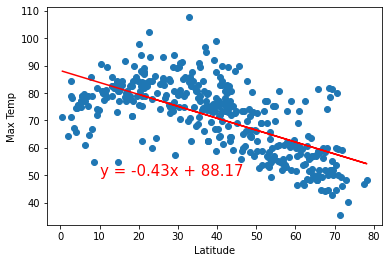

In [256]:
liner_reg_func(df_n['Lat'],df_n['Max Temp'])
reg_annot((10,50))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.71657576777166


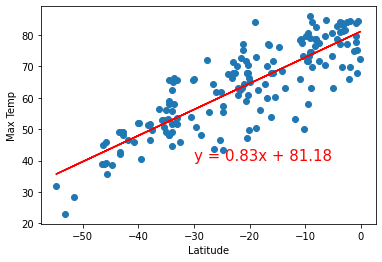

In [257]:
liner_reg_func(df_s['Lat'],df_s['Max Temp'])
reg_annot((-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.017064914506767736


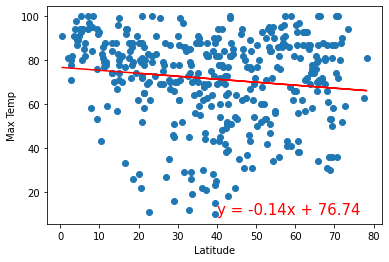

In [285]:
liner_reg_func(df_n['Lat'],df_n['Humidity'])
reg_annot((40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004432358775342756


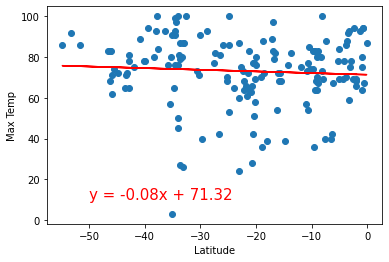

In [283]:
liner_reg_func(df_s['Lat'],df_s['Humidity'])
reg_annot((-50,10))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 2.840044279644633e-06


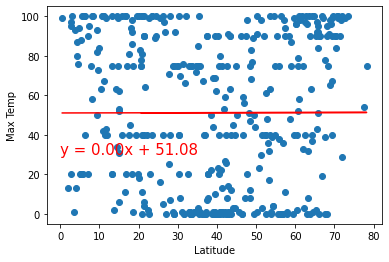

In [282]:
liner_reg_func(df_n['Lat'],df_n['Cloudiness'])
reg_annot((0,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013000684732806937


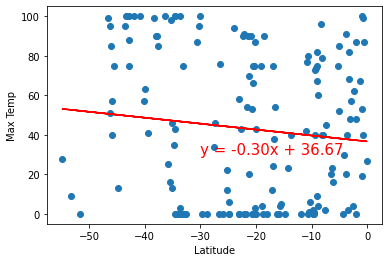

In [271]:
liner_reg_func(df_s['Lat'],df_s['Cloudiness'])
reg_annot((-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004299199097049677


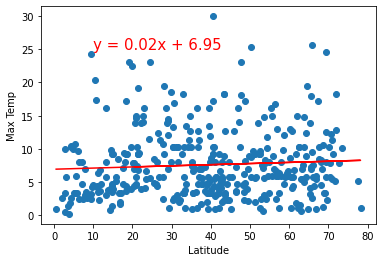

In [281]:
liner_reg_func(df_n['Lat'],df_n['Wind Speed'])
reg_annot((10,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004220403882200297


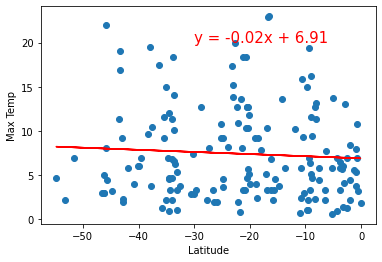

In [279]:
liner_reg_func(df_s['Lat'],df_s['Wind Speed'])
reg_annot((-30,20))